# Notebook exercise 3

## 3.1

### Assignment

<span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$


Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.
Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$


Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.

##### For comparison, Black-Scholes analytic solution:

In [3]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib.pyplot as plt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Solution

In order to evaluate the value of the Call and the Put option I implement two function to calculate $S(t)$ with directly and iteratly method: 
```c++ 
double S_it(double t, int n_t, double S_i, Random &rnd, double mu, double sigma){
    double step = t/n_t;
    double S=0;
    double temp=S_i;
    for(int i=0; i<n_t; i++){
        double z = rnd.Gauss(0,1);
        S = temp * exp((mu - 0.5 * pow(sigma,2))* step + sigma * z * sqrt(step));
        temp = S; 
    }
    return S;
}

double S_fin(double t, double S0, Random &rnd, double r, double sigma){
    double W = rnd.Gauss(0,t);
    double S = S0 * exp((r - 0.5 * pow(sigma,2))*t + sigma * W);
    return S;
}.
```
The value of the option are related to $S(t)$ by the following relation: 
$$ C(t) = e^{-r t} \ max(0, S(t) - K) $$
$$ P(t) = e^{-r t} \ max(0, K - S(t)) $$
where $K$ is the strike price. Using these relations, I evaluated the value of both options with the two different methods. To calculate the mean value and the error, I used data blocking with $10^2$ blocks and $10^4$ extractions per block. The figures show the four estimations, all of which are compatible with the theoretical values predicted by the Black-Scholes analytical solution.

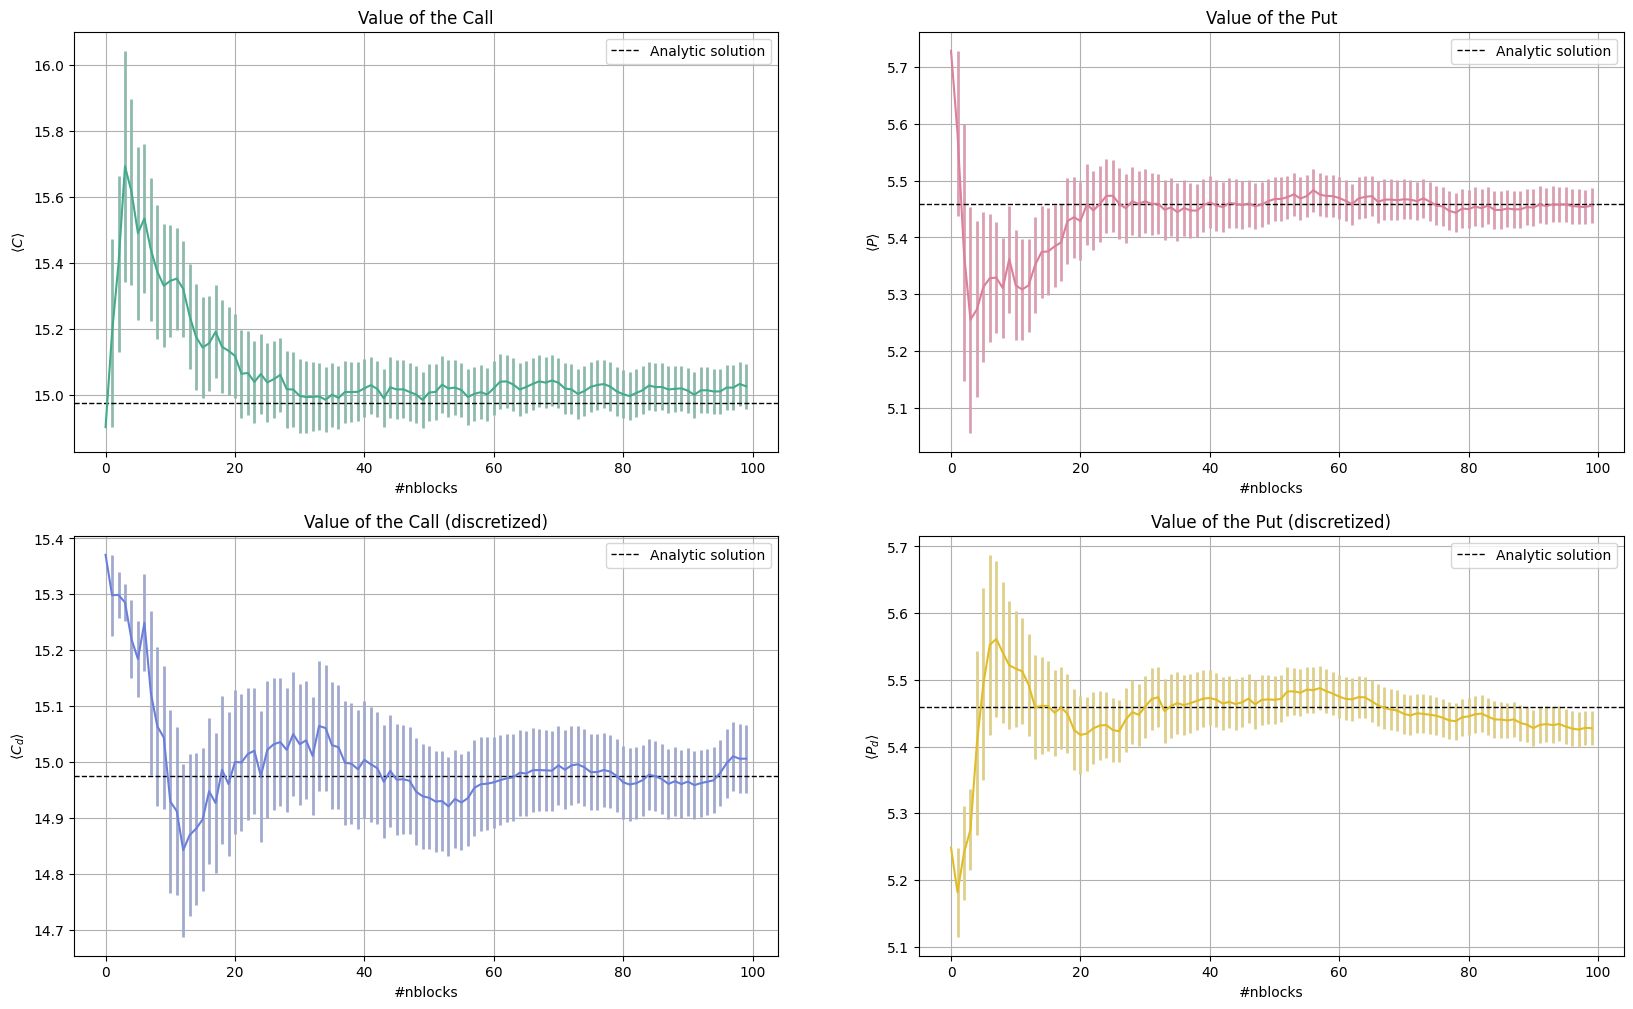

In [4]:
data_c = np.loadtxt("data/es3_c.dat")
data_p = np.loadtxt("data/es3_p.dat")
data_c_it = np.loadtxt("data/es3_c_it.dat")
data_p_it = np.loadtxt("data/es3_p_it.dat")

fig, axes = plt.subplots(2, 2, figsize=(20, 12))  
axes = axes.flatten()

axes[0].errorbar(data_c[:,0],data_c[:,1],yerr=data_c[:,2], color='#43AA8B', ecolor="#8EBAAC", elinewidth=2, capsize=0)
axes[0].set_title(r'Value of the Call')
axes[0].set_xlabel('#nblocks')
axes[0].set_ylabel(r'$\langle C \rangle $')
axes[0].grid(True)
axes[0].axhline(y=call, c = 'black', linestyle='--', linewidth=1, label='Analytic solution')
axes[0].legend()

axes[1].errorbar(data_p[:,0],data_p[:,1], yerr=data_p[:,2], color='#DC7F9B', ecolor="#DA9FB1", elinewidth=2, capsize=0)
axes[1].set_title(r'Value of the Put')
axes[1].set_xlabel('#nblocks')
axes[1].set_ylabel(r'$\langle P \rangle $')
axes[1].grid(True)
axes[1].axhline(y=put, c = 'black', linestyle='--', linewidth=1, label='Analytic solution')
axes[1].legend()

axes[2].errorbar(data_c_it[:,0], data_c_it[:,1], yerr=data_c_it[:,2], color='#6A7FDB', ecolor='#A1A9CE', elinewidth=2, capsize=0)
axes[2].set_title(r'Value of the Call (discretized)')
axes[2].set_xlabel('#nblocks')
axes[2].set_ylabel(r'$\langle C_d \rangle $')
axes[2].grid(True)
axes[2].axhline(y=call, linestyle='--', c = 'black', linewidth=1, label='Analytic solution')
axes[2].legend()

axes[3].errorbar(data_p_it[:,0],data_p_it[:,1], yerr=data_p_it[:,2], color='#E1BC29', ecolor='#DECF8A', elinewidth=2, capsize=0)
axes[3].set_title(r'Value of the Put (discretized)')
axes[3].set_xlabel('#nblocks')
axes[3].set_ylabel(r'$\langle P_d \rangle $')
axes[3].grid(True)
axes[3].axhline(y=put, linestyle='--', c = 'black', linewidth=1, label='Analytic solution')
axes[3].legend()

plt.show()